In [49]:
###-----------------
### Import Libraries
###-----------------
import sys


sys.path.append('../')
 

import os
import gc
import time
import numpy as np
import pandas as pd
import seaborn as sns
from torchsummary import summary
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import tensorflow as tf
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Global variables
inpDir = '../input' # Input Stored here
outDir = '../ouput' # output Here
modelDir = './models'# to save Models
subDir = 'fifa_2019' # sub dir by dataset
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)



BATCH_SIZE = 64
NOISE = 0.2 
ALPHA = 0.001 
EPOCHS = 30
TEST_SIZE = 0.2

In [52]:
#set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize':(15,6),
    'axes.labelsize':'medium',
    'axes.titlesize':'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize':'medium',
    #'text.usetex':True,
}
plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


$$\text{
    Load Weather Data
}$$

In [53]:
fileName = 'weatherHistory.csv'
data_df = pd.read_csv(os.path.join(inpDir,fileName))
data_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [54]:
data_df['datetime'] = pd.to_datetime(data_df['Formatted Date'], utc=True)

In [55]:
num_cols = [
    'Temperature (C)', 
    'Humidity', 
    'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 
    'Visibility (km)', 
    'Pressure (millibars)', 
]

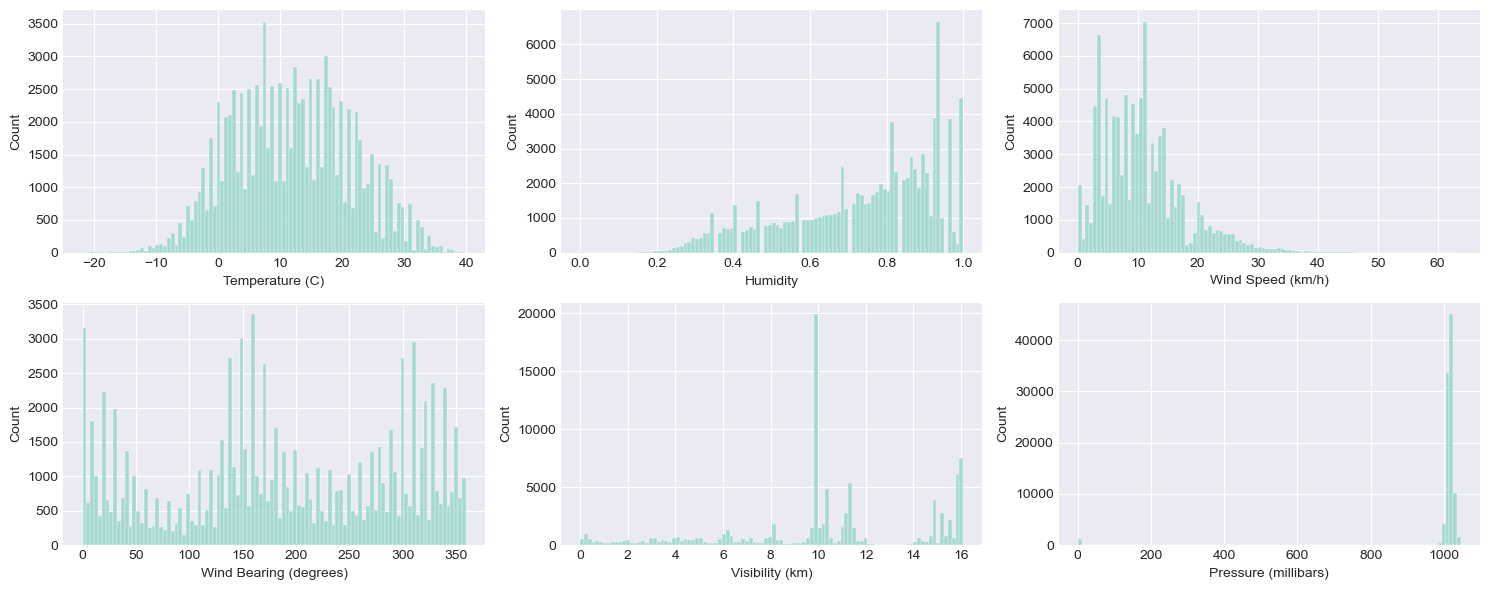

In [56]:
fig, axes = plt.subplots(2,3)

nbin = 100
axes = axes.ravel()

for count, col in enumerate(num_cols):
    ax = axes[count]
    sns.histplot(data=data_df, x=col,ax=ax, bins=nbin)

plt.tight_layout()
plt.show()

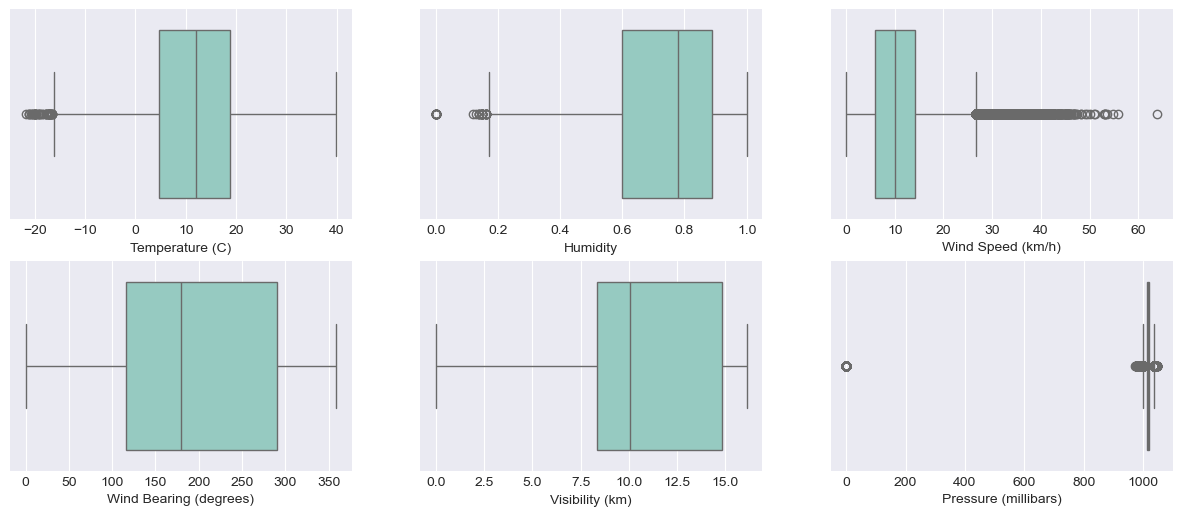

In [57]:
fig, axes = plt.subplots(2,3)

axes = axes.ravel()

for count, col in enumerate(num_cols):
    ax = axes[count]
    sns.boxplot(data=data_df, x=col,ax=ax)

plt.show()

<Axes: >

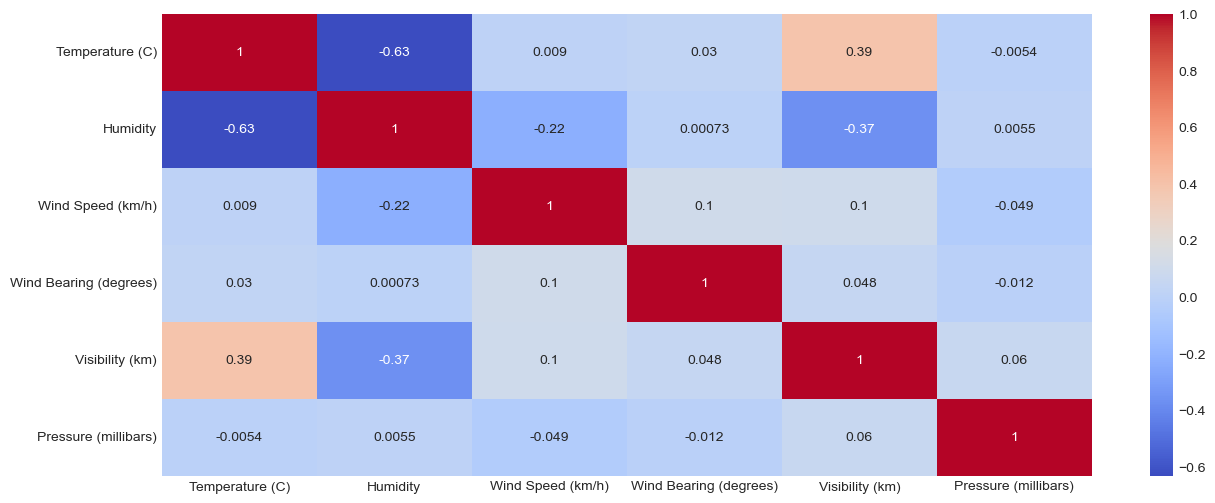

In [58]:
sns.heatmap(data=data_df[num_cols].corr(), annot=True, cmap=CMAP)

In [60]:
data_df['datetime']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: datetime, Length: 96453, dtype: datetime64[ns, UTC]

In [68]:
temp_df = data_df[['datetime', 'Temperature (C)']]
temp_df = temp_df.sort_values(by=['datetime'], axis=0, ascending=True)
temp_df = temp_df.reset_index(drop=True)
temp_df.rename({
    'Temperature (C)': 'temp'
}, axis=1, inplace=True)

temp_df.head()


,datetime,temp
0,2005-12-31 23:00:00+00:00,0.577778
1,2006-01-01 00:00:00+00:00,1.161111
2,2006-01-01 01:00:00+00:00,1.666667
3,2006-01-01 02:00:00+00:00,1.711111
4,2006-01-01 03:00:00+00:00,1.183333


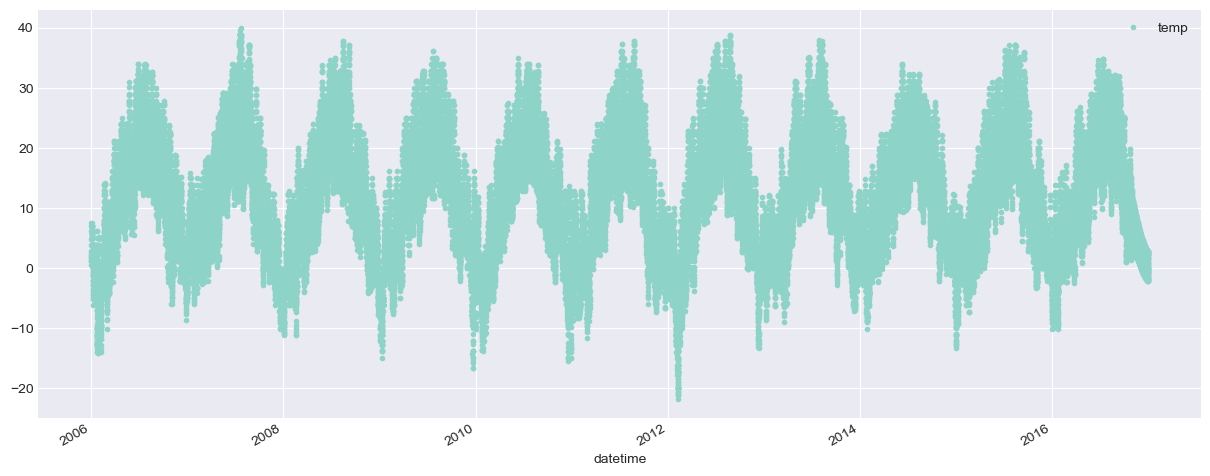

In [70]:
ax = temp_df.plot(x='datetime', y='temp', style='.')

In [72]:
h_units= 100
input_shape = (1,10000)

model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Input(
        shape=input_shape
    )
)

model.add(
    tf.keras.layers.SimpleRNN(
        units=h_units,
        activation='tanh'
    )
)

In [ ]:
num_sample = int(X_train.shape[0]*BATCH_SIZE)

# Train Sample
X_train = X_train[:num_sample]
y_train = y_train[:num_sample]
y_true = y_true[:num_sample]

# Test Sample
X_test = X_test[:num_sample]
y_test = y_test[:num_sample]

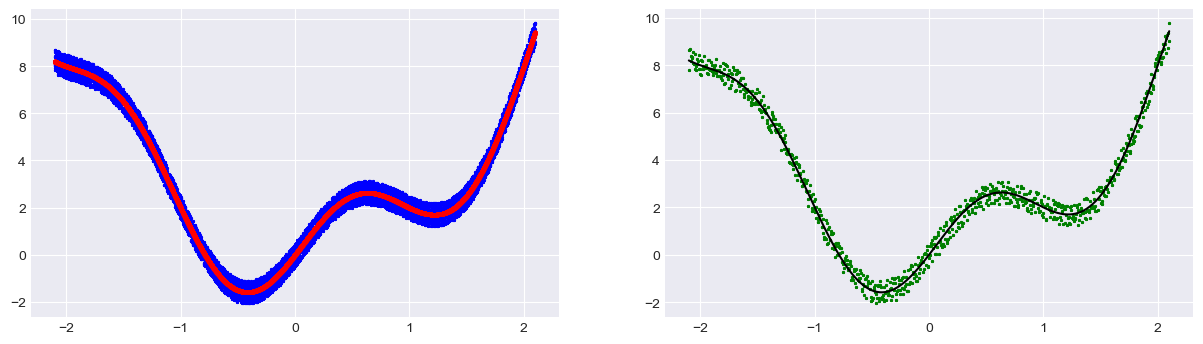

In [ ]:
fig, axes = plt.subplots(1, 2)

ax = axes[0]
ax.plot(X_train, y_train, 'b*', markersize=2, label='Train')
ax.plot(X_train, y_true, 'r*', markersize=3, label='Train')

ax = axes[1]
ax.plot(X_test, y_test, 'g*', markersize=2, label='Test')
ax.plot(X_test, y_true_test, 'k', markersize=2, label='Test')
plt.show()

$$\text{
    Creating the model
}
$$

In [ ]:
# Input
inputs = tf.keras.Input(
    shape=(1,), 
    name='input'
)

# Hidden Layer
x = tf.keras.layers.Dense(
    128, 
    activation=tf.keras.activations.relu, 
    name='fc_1'
)(inputs)

x = tf.keras.layers.Dense(
    64, 
    activation=tf.keras.activations.relu, 
    name='fc_2'
)(x)

# Output 
outputs = tf.keras.layers.Dense(
    1, 
    name='output'
)(x)

                                

# Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

$$\text{
    Compiling the model
}
$$

In [ ]:
# Optimized for model
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

# Compile
model.compile(
    optimizer = optimizer,
    loss = 'mean_squared_error',
    metrics = ['mae'],
)

$$\text{
    Fitting the model
}
$$

In [ ]:
history = model.fit(
    x=X_train,
    y=y_train, 
    validation_data = [X_test, y_true_test],
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs =EPOCHS
)

Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 10.6327 - mae: 2.4957 - val_loss: 2.4572 - val_mae: 1.3150
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0127 - mae: 1.1740 - val_loss: 0.9585 - val_mae: 0.7517
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9966 - mae: 0.7534 - val_loss: 0.8527 - val_mae: 0.6406
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9105 - mae: 0.6988 - val_loss: 0.7713 - val_mae: 0.6071
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8094 - mae: 0.6609 - val_loss: 0.6342 - val_mae: 0.5495
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6603 - mae: 0.6010 - val_loss: 0.4544 - val_mae: 0.4588
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4749 - mae: 0.5174 - val_loss: 0.2695 - val_mae: 0.3440
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3142 - mae: 0.4303 - val_loss: 0.1432 - val_mae: 0.2471
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

$$\text{
    Getting history and Plotting Accuracy and Loss Graphs
}
$$

,loss,mae,val_loss,val_mae
0,6.475044,1.945415,2.457204,1.315009
1,1.602583,1.029504,0.958459,0.751709
2,0.966438,0.730404,0.852744,0.640644


,loss,mae,val_loss,val_mae
47,0.089303,0.256497,0.006601,0.062467
48,0.089281,0.256469,0.006607,0.062531
49,0.089248,0.256415,0.006522,0.061918


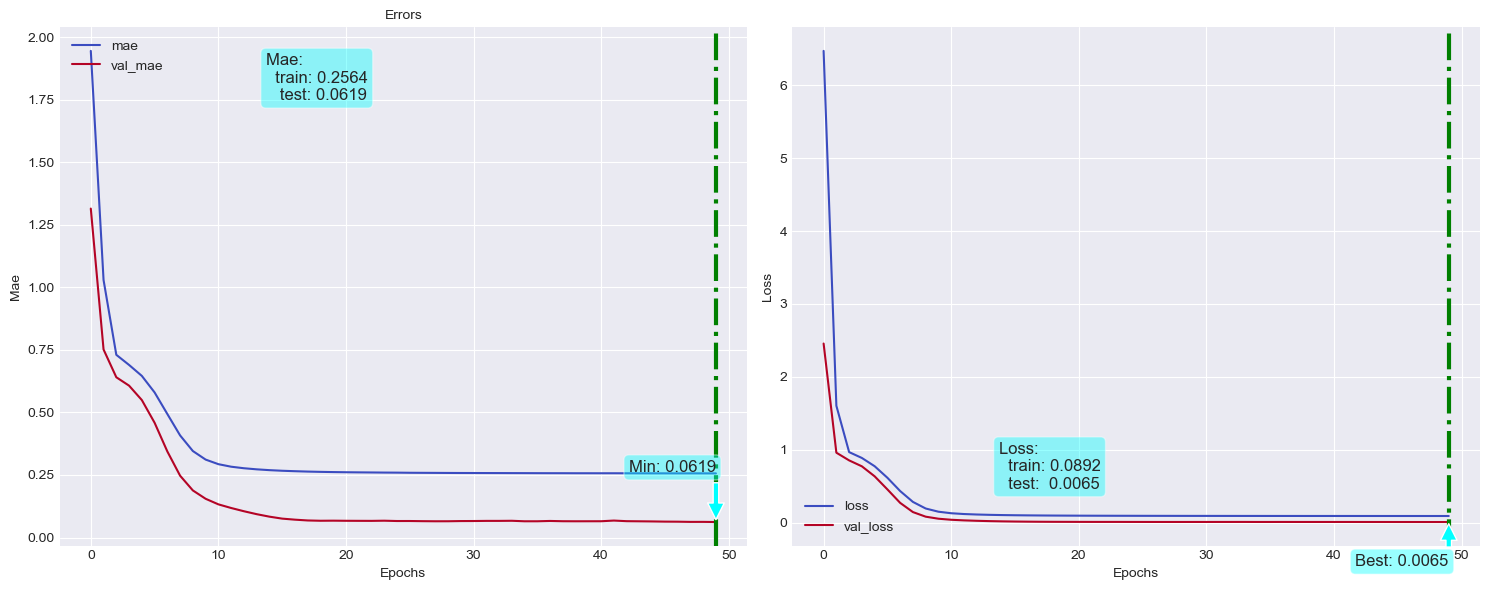

In [ ]:
from utils.helper import fn_plot_tf_hist


hist_df = pd.DataFrame(history.history) 

display(hist_df.head(3))
display(hist_df.tail(3))

fn_plot_tf_hist(hist_df = hist_df)

In [ ]:
y_pred = model.predict(X_test)

result_df = pd.DataFrame({
    'test':y_test,
    'pred':y_pred[:,0],
})

result_df['true']= y_true_test
result_df.head()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,test,pred,true
0,7.792714,8.322505,8.201966
1,8.633752,8.311446,8.189969
2,8.677438,8.300386,8.178218
3,8.183650,8.289329,8.166704
4,8.382352,8.278269,8.155420


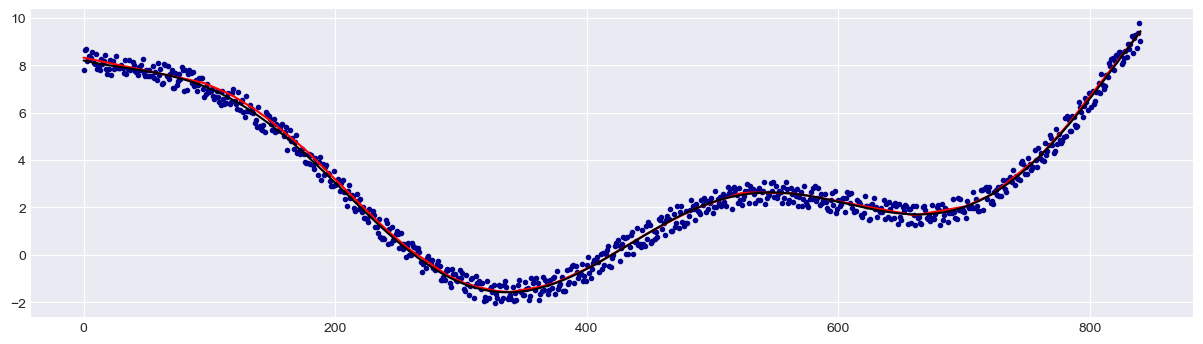

In [ ]:
ax = result_df.pred.plot(c='r', label='pred')
result_df.true.plot(c='k', label='true')

plt.scatter(result_df.index, result_df.test,c='DarkBlue', marker='.')